In [172]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import pickle

In [173]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ojiha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ojiha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [174]:
def createConfussionMatrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    # Plot the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    

In [175]:
def preprocessText(text):
    tokens = []
    words = word_tokenize(text.lower())
    for word in words:
        if (word not in string.punctuation) and (word not in stopwords.words('english')):
            tokens.append(word)
    return tokens

In [176]:
vectorizer = CountVectorizer(analyzer=preprocessText)

In [177]:
df = pd.read_csv("C:\\CS\\ML_lab\\data\\amazon_alexa.tsv", delimiter = '\t')
df.dropna(inplace = True)

In [178]:
X = df['verified_reviews']
y = df['feedback']
X_vectorized = vectorizer.fit_transform(X)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [180]:
modelLogistic = LogisticRegression()

In [181]:
modelLogistic.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [182]:
accuracyLogistic = modelLogistic.score(X_test, y_test)
print(f'Logistic regression model accuracy : {accuracyLogistic * 100}')

Logistic regression model accuracy : 82.53968253968253


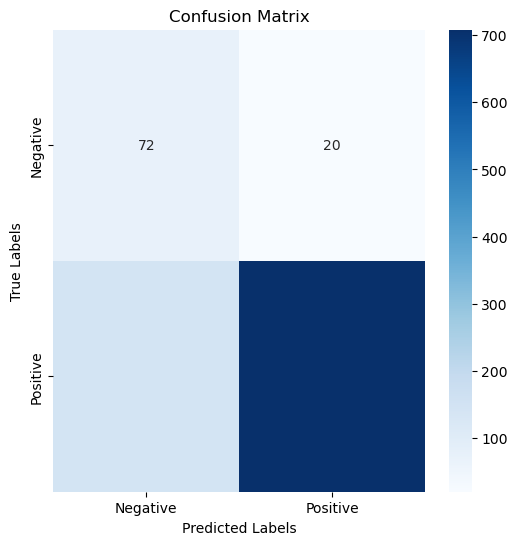

              precision    recall  f1-score   support

           0       0.33      0.78      0.47        92
           1       0.97      0.83      0.90       853

    accuracy                           0.83       945
   macro avg       0.65      0.81      0.68       945
weighted avg       0.91      0.83      0.85       945



In [183]:
y_pred_Logistic = modelLogistic.predict(X_test)
createConfussionMatrix(y_test, y_pred_Logistic)
print(classification_report(y_test, y_pred_Logistic))

In [184]:
modelRandomForest = RandomForestClassifier(n_estimators=100)

In [185]:
modelRandomForest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [186]:
accuracyRandomForest = modelRandomForest.score(X_test, y_test)
print(f'Random Forest model accuracy : {accuracyRandomForest * 100}')

Random Forest model accuracy : 75.13227513227513


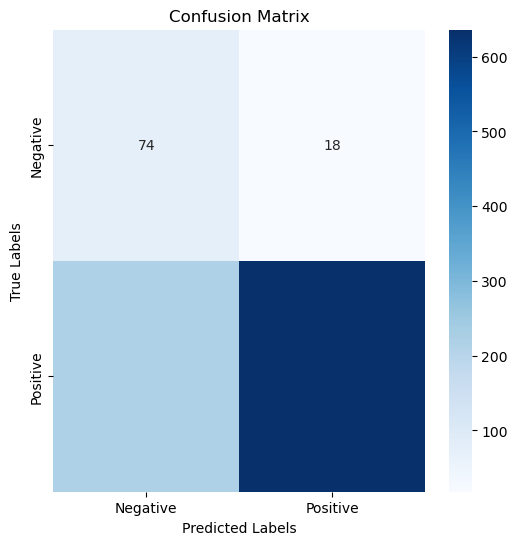

              precision    recall  f1-score   support

           0       0.25      0.80      0.39        92
           1       0.97      0.75      0.84       853

    accuracy                           0.75       945
   macro avg       0.61      0.77      0.62       945
weighted avg       0.90      0.75      0.80       945



In [187]:
y_pred_Random = modelRandomForest.predict(X_test)
createConfussionMatrix(y_test, y_pred_Random)
print(classification_report(y_test, y_pred_Random))

In [188]:
modelNaiveBays = MultinomialNB()

In [189]:
modelNaiveBays.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [190]:
accuracyNaiveBays = modelNaiveBays.score(X_test, y_test)
print(f'Naive bays model accuracy : {accuracyNaiveBays * 100}')

Naive bays model accuracy : 73.12169312169313


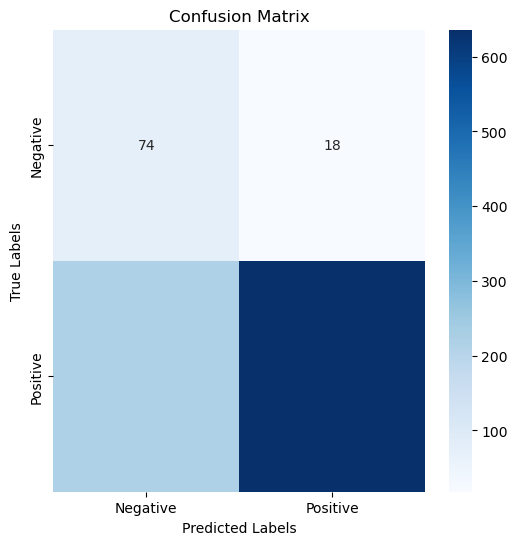

              precision    recall  f1-score   support

           0       0.25      0.80      0.39        92
           1       0.97      0.75      0.84       853

    accuracy                           0.75       945
   macro avg       0.61      0.77      0.62       945
weighted avg       0.90      0.75      0.80       945



In [191]:
y_pred_NaiveBays = modelNaiveBays.predict(X_test)
createConfussionMatrix(y_test, y_pred_Random)
print(classification_report(y_test, y_pred_Random))

<BarContainer object of 3 artists>

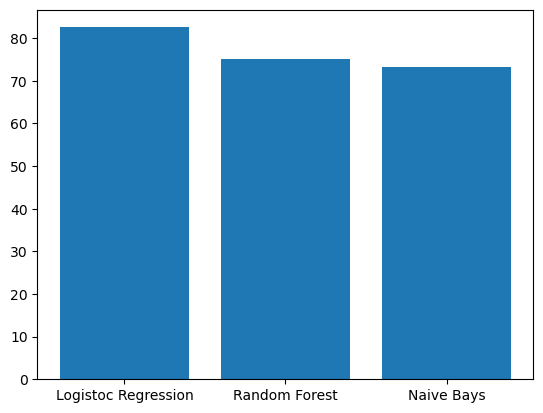

In [192]:
y = [accuracyLogistic*100, accuracyRandomForest*100, accuracyNaiveBays*100]
x = ["Logistoc Regression", "Random Forest", "Naive Bays"]
plt.bar(x, y)

In [193]:
with open('C:/CS/ML_lab/models/Logistic_sentiment_model.pkl', 'wb') as f:
    pickle.dump(modelLogistic, f)

In [194]:
with open('C:/CS/ML_lab/models/count_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)